## Ridge regression

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#### Declare some visual functions

In [16]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()

#### Select feature

##### Read data

- Training set

In [17]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Legal Status,House Direction,Floors,Rooms,Toilets,Furnishing Sell,Price
0,10.401867,4.001773,8.062258,2.236068,-0.647076,1,2.0,1.414214,1.818446,1.414214,4.0,-1.467406
1,10.401884,4.001535,8.062258,2.236068,-0.815934,1,6.0,1.414214,1.818446,1.732051,3.0,-1.467329
2,10.404109,4.005330,9.486833,2.236068,0.703785,1,1.0,2.236068,2.893444,2.645751,4.0,-1.449948
3,10.399711,4.005830,8.660254,2.236068,-0.309361,4,7.0,1.000000,1.443635,1.000000,1.0,-1.354036
4,10.400744,4.006028,8.944272,2.236068,0.534928,5,6.0,1.000000,0.881374,1.000000,4.0,-1.351444


##### Input variables

- Training set

In [18]:
x = df.drop(columns=["Price", "Legal Status", "Width (m)"])
x.head()

,Longitude,Latitude,Area (m²),Length (m),House Direction,Floors,Rooms,Toilets,Furnishing Sell
0,10.401867,4.001773,8.062258,-0.647076,2.0,1.414214,1.818446,1.414214,4.0
1,10.401884,4.001535,8.062258,-0.815934,6.0,1.414214,1.818446,1.732051,3.0
2,10.404109,4.005330,9.486833,0.703785,1.0,2.236068,2.893444,2.645751,4.0
3,10.399711,4.005830,8.660254,-0.309361,7.0,1.000000,1.443635,1.000000,1.0
4,10.400744,4.006028,8.944272,0.534928,6.0,1.000000,0.881374,1.000000,4.0


##### Target variables

- Training set

In [19]:
y = df[['Price']]
y.head()

,Price
0,-1.467406
1,-1.467329
2,-1.449948
3,-1.354036
4,-1.351444


##### Divide into 2 training sets and validation sets

 - Split data

In [20]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=554)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(3297, 9) (825, 9)
(3297, 1) (825, 1)


#### Select Alpha coefficient

In [21]:
alpha_range = np.arange(0.05, 1, 0.05)
models = {}

def _regression(alpha, X_train, y_train, X_validation, y_validation, models: dict):
    dict_models = {}
    rid_regr = Ridge(alpha=alpha)
    rid_regr.fit(X_train, y_train)
    y_pred = rid_regr.predict(X_validation)
    MSE = np.mean((y_validation-y_pred)**2)
    dict_models["MSE"] = MSE
    dict_models["model"] = rid_regr
    model_name = "ridge_" + str(alpha)
    models[model_name] = dict_models
    return models

for alpha in alpha_range:
  models = _regression(round(alpha, 2), X_train, y_train, X_validation, y_validation, models)

# Print out the model with the best alpha coefficient (smallest MSE)
i = 0
for k, v in models.items():
  if i==0:
    best_model = k
    mse = models[k]["MSE"]
  if models[k]["MSE"] < mse:
    best_model = k
  print("model {}, MSE: {}".format(k, models[k]["MSE"]))
  i+=1

print("-----------------------------------------")
print("Best models: {}, MSE: {}".format(best_model, models[best_model]["MSE"]))


model ridge_0.05, MSE: 0.4626994721942075
model ridge_0.1, MSE: 0.4755231778819477
model ridge_0.15, MSE: 0.4810095560870548
model ridge_0.2, MSE: 0.4841002397533461
model ridge_0.25, MSE: 0.48609186639903124
model ridge_0.3, MSE: 0.48748450831597095
model ridge_0.35, MSE: 0.4885138075683166
model ridge_0.4, MSE: 0.4893058046055637
model ridge_0.45, MSE: 0.4899341599599287
model ridge_0.5, MSE: 0.49044485225520096
model ridge_0.55, MSE: 0.49086808479166166
model ridge_0.6, MSE: 0.4912245254399447
model ridge_0.65, MSE: 0.4915287985470667
model ridge_0.7, MSE: 0.4917915455720264
model ridge_0.75, MSE: 0.4920206956999764
model ridge_0.8, MSE: 0.49222227884499453
model ridge_0.85, MSE: 0.49240096256035637
model ridge_0.9, MSE: 0.4925604164495498
model ridge_0.95, MSE: 0.49270356548461314
-----------------------------------------
Best models: ridge_0.05, MSE: 0.4626994721942075


*So with Alpha 0.05 will give the most optimal model*

#### Model training

##### 4.1 Create a Ridge Regression model object from the linear_model library and train it with input and target variables

In [22]:
ridge_regression = Ridge(alpha=0.05)
ridge_regression.fit(X_train, y_train)


Ridge(alpha=0.05)

##### Real estate price prediction

- Prediction on validation set

In [23]:
y_pred_validation = ridge_regression.predict(X_validation)
y_pred_validation

array([[-4.19773267e-01],
       [-9.21326600e-02],
       [ 6.65211093e-01],
       [ 2.43567834e-01],
       [-1.02668868e+00],
       [-4.16871349e-01],
       [-2.40012452e-01],
       [-1.41905245e-01],
       [ 2.93153380e-01],
       [ 6.39813852e-01],
       [-7.92395038e-02],
       [-3.62261091e-01],
       [-4.46900898e-01],
       [-1.80723502e-01],
       [-5.83259402e-01],
       [-2.48400084e-02],
       [ 3.25640233e-01],
       [-3.91621474e-01],
       [-3.94144275e-01],
       [-5.26866305e-02],
       [-4.88378770e-01],
       [ 1.08493397e+00],
       [-1.19942987e-01],
       [ 1.86453472e-01],
       [-2.46042797e-01],
       [ 9.84962334e-02],
       [ 1.55466688e+00],
       [-4.71382343e-01],
       [-4.10724760e-01],
       [-1.11478499e-01],
       [ 4.11934895e-01],
       [-2.49742081e-01],
       [-5.80845069e-02],
       [-4.81951176e-02],
       [ 5.52274075e-02],
       [ 2.58902388e+00],
       [ 2.15831822e-01],
       [-7.54922553e-02],
       [ 1.0

- On the train set

In [24]:
y_pred_train = ridge_regression.predict(X_train)
y_pred_train

array([[-0.06781145],
       [ 0.3930196 ],
       [-0.38474443],
       ...,
       [ 0.08514221],
       [ 1.22940273],
       [ 0.39477967]])

##### Model evaluation based on MSE and R-squared

- Review on Train

In [25]:
# Calculate MSE
mse_ridge_train = mean_squared_error(y_train, y_pred_train)

# Calculate R-squared
r2_ridge_train = r2_score(y_train, y_pred_train)

# Calculate MAPE
n = len(y_train)
mape = (1/n) * np.sum((np.abs((y_pred_train - y_train) / y)) * 100, axis=0)

print("Train Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge_train)
print("R-squared of Ridge Model:", r2_ridge_train * 100)
print("MAPE of Ridge Model:", mape)

Train Set:
Mean Squared Error (MSE) of Ridge Model: 0.4937882733406695
R-squared of Ridge Model: 50.96738399405789
MAPE of Ridge Model: Price    230.030386
dtype: float64


- Evaluation on the Validation set

In [26]:
# Calculate MSE
mse_ridge = mean_squared_error(y_validation, y_pred_validation)

# Calculate R-squared
r2_ridge = r2_score(y_validation, y_pred_validation)

# Calculate MAPE
n = len(y_validation)
mape = (1/n) * np.sum((np.abs((y_pred_validation - y_validation) / y)) * 100, axis=0)

print("Validation Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge)
print("R-squared of Ridge Model:", r2_ridge * 100)
print("MAPE of Ridge Model:", mape)

Validation Set:
Mean Squared Error (MSE) of Ridge Model: 0.4626994721942075
R-squared of Ridge Model: 52.38645407399542
MAPE of Ridge Model: Price    213.836633
dtype: float64


#### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

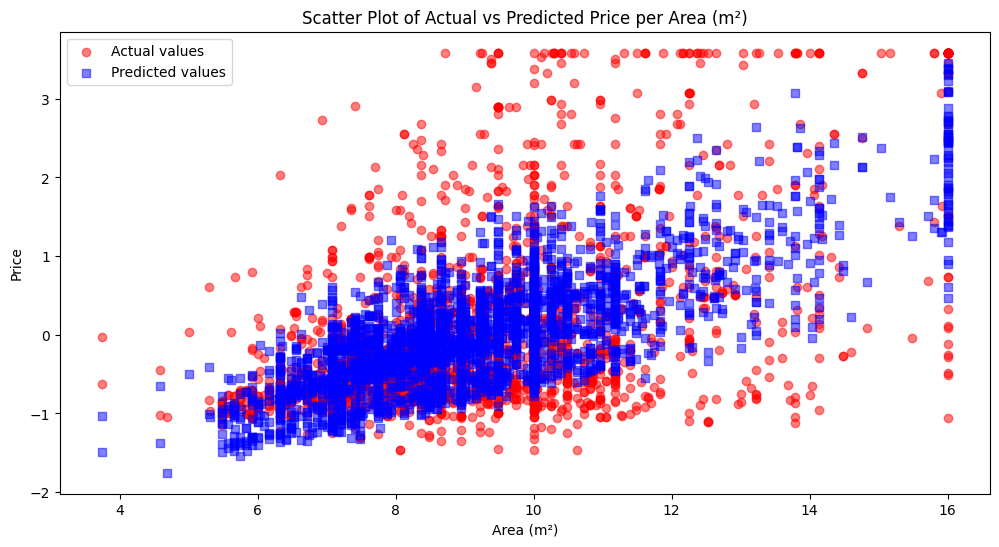

In [27]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

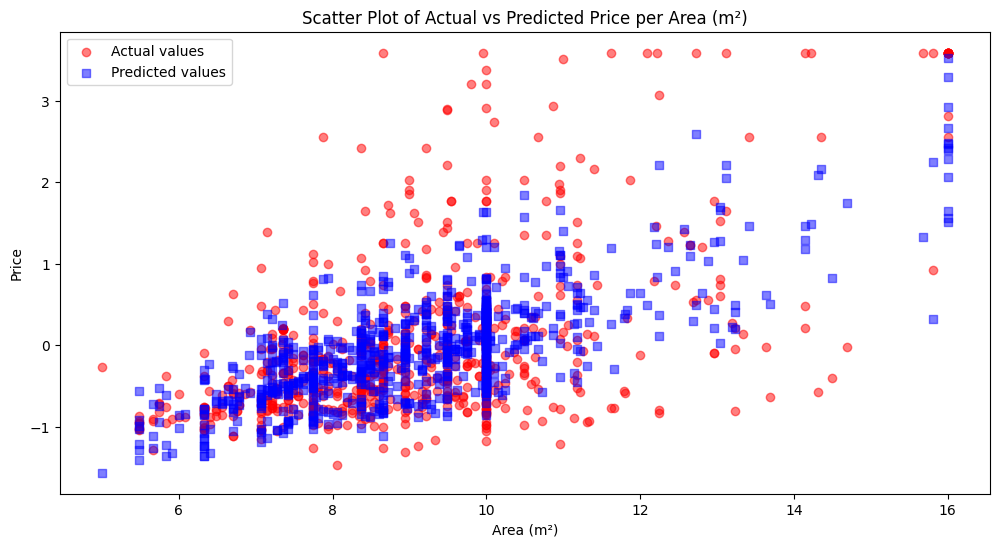

In [28]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

##### Advantages
<li>Provides a more stable solution than conventional Linear Regression by minimizing the magnitude of the coefficients, which improves accuracy and reduces the risk of overfitting</li>
<li>Maintains flexibility so that the model can adapt to new data</li>

##### Disadvantages
<li>More complex than Linear Regression</li>
<li>Not stable because changing random_state values ​​can cause model performance fluctuations</li>